In [77]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf, pacf
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
data = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/processed/lagged_2012-2013-solar-electricity-data.csv")
data.datetime = pd.to_datetime(data.datetime)

data.head(20)

,Unnamed: 0,Unnamed: 0.1,Customer,Generator Capacity,Postcode,Consumption Category,date,time,consumption,datetime,...,lag_158,lag_159,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167
0,211740,5908530,1,3.78,2076,controlled_load_consumption,1/10/2012,11:30,0.000,2012-01-10 11:30:00,...,0.000,0.000,0.556,0.569,0.131,1.263,1.250,1.250,1.250,1.081
1,211741,5908531,1,3.78,2076,general_electricity_consumption,1/10/2012,11:30,0.086,2012-01-10 11:30:00,...,0.076,0.665,1.245,0.612,0.597,0.544,0.604,0.786,0.855,0.068
2,211742,5908532,1,3.78,2076,solar_generation,1/10/2012,11:30,0.650,2012-01-10 11:30:00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,221352,6177087,1,3.78,2076,controlled_load_consumption,1/10/2012,12:00,0.000,2012-01-10 12:00:00,...,0.950,0.000,0.000,0.556,0.569,0.131,1.263,1.250,1.250,1.250
4,221353,6177088,1,3.78,2076,general_electricity_consumption,1/10/2012,12:00,0.059,2012-01-10 12:00:00,...,0.140,0.076,0.665,1.245,0.612,0.597,0.544,0.604,0.786,0.855
5,221354,6177089,1,3.78,2076,solar_generation,1/10/2012,12:00,1.075,2012-01-10 12:00:00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,230964,6445644,1,3.78,2076,controlled_load_consumption,1/10/2012,12:30,0.000,2012-01-10 12:30:00,...,0.000,0.950,0.000,0.000,0.556,0.569,0.131,1.263,1.250,1.250
7,230965,6445645,1,3.78,2076,general_electricity_consumption,1/10/2012,12:30,0.103,2012-01-10 12:30:00,...,0.657,0.140,0.076,0.665,1.245,0.612,0.597,0.544,0.604,0.786
8,230966,6445646,1,3.78,2076,solar_generation,1/10/2012,12:30,0.388,2012-01-10 12:30:00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,240576,6714201,1,3.78,2076,controlled_load_consumption,1/10/2012,13:00,0.000,2012-01-10 13:00:00,...,0.000,0.000,0.950,0.000,0.000,0.556,0.569,0.131,1.263,1.250


In [52]:
solar = data[(data['Consumption Category'] == 'solar_generation') & (data['Customer'] == 1)]
solar.head()


,Unnamed: 0,Unnamed: 0.1,Customer,Generator Capacity,Postcode,Consumption Category,date,time,consumption,datetime,...,lag_158,lag_159,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167
2,211742,5908532,1,3.78,2076,solar_generation,1/10/2012,11:30,0.650,2012-01-10 11:30:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,221354,6177089,1,3.78,2076,solar_generation,1/10/2012,12:00,1.075,2012-01-10 12:00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,230966,6445646,1,3.78,2076,solar_generation,1/10/2012,12:30,0.388,2012-01-10 12:30:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,240578,6714203,1,3.78,2076,solar_generation,1/10/2012,13:00,1.350,2012-01-10 13:00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,250190,6982760,1,3.78,2076,solar_generation,1/10/2012,13:30,1.725,2012-01-10 13:30:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
solar_acf_coef = acf(solar.consumption, nlags=300)
# plot_acf(solar_acf_coef, lags=200)

In [66]:
solar_acf_coef

(array([ 1.        ,  0.95009952,  0.88581302,  0.80744643,  0.71485609,
         0.61199813,  0.50193989,  0.38890737,  0.27601145,  0.1676053 ,
         0.06639227, -0.02610841, -0.10726951, -0.17720193, -0.23534843,
        -0.28215495, -0.3184326 , -0.34552609, -0.36489327, -0.37818506,
        -0.38682901, -0.3920514 , -0.3949005 , -0.39627468, -0.39672295,
        -0.3964695 , -0.39538065, -0.3929326 , -0.38833628, -0.38054155,
        -0.3682264 , -0.34983538, -0.32428275, -0.29019162, -0.24656513,
        -0.19286143, -0.12883003, -0.05435531,  0.02959648,  0.1199029 ,
         0.21641809,  0.31566598,  0.41420816,  0.508142  ,  0.59314484,
         0.66539363,  0.71810424,  0.75105462,  0.76074242,  0.74441857,
         0.70593598,  0.64811647,  0.57262343,  0.48741803,  0.39344022,
         0.29600914,  0.19759638,  0.10331706,  0.01449604, -0.06733412,
        -0.14024505, -0.20278615, -0.25429072, -0.29560838, -0.32748245,
        -0.35127519, -0.36849358, -0.38029332, -0.3

controlled_load_consumption


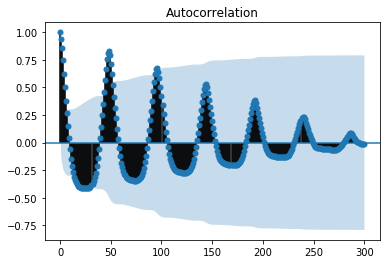

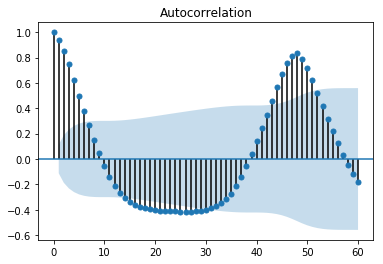

general_electricity_consumption


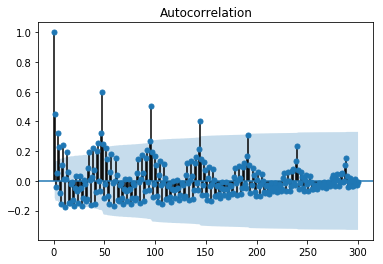

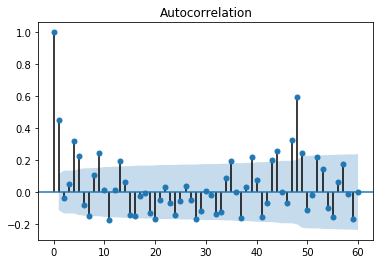

solar_generation


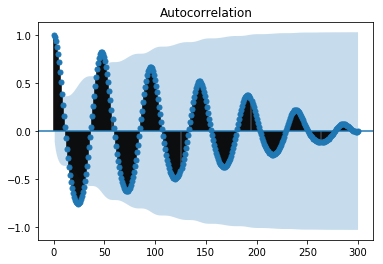

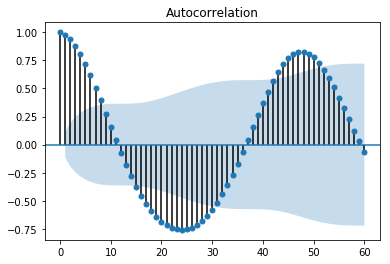

In [89]:
for category, grouped_data in data.groupby("Consumption Category"):
    print(category)
    data_category = data[(data['Consumption Category'] == category) & (data['Customer'] == 1)]

    dat_acf_coef = acf(data_category.consumption, nlags=300)
    plot_acf(dat_acf_coef, lags=300)
    plot_acf(dat_acf_coef, lags=60)
    plt.show()
    plt.close()